SANDBOX

In [6]:
#Import libraries

import ee 
import geemap
import xee
import xarray as xr
import matplotlib.pyplot as plt


In [2]:
#Authenticate/initialize earth engine
ee.Authenticate()



Successfully saved authorization token.


In [7]:
ee.Initialize(
    project = 'sar-testing-472822',
    opt_url = 'https://earthengine-highvolume.googleapis.com'
)

In [ ]:
Map = geemap.Map(basemap = 'TERRAIN')
Map #to view map, selected point in US

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], position='topright', transp…

In [39]:
loc = Map.draw_last_feature.geometry()
usa = (
    ee.FeatureCollection("USDOS/LSIB_SIMPLE/2017") 
    .filterBounds(loc)
    .geometry()
)
Map.addLayer(usa, {}, 'usa')
usa.getInfo()

{'type': 'MultiPolygon',
 'coordinates': [[[[-80.69169618956559, 24.885360753782464],
    [-80.69338991199832, 24.885360691726703],
    [-80.69419093775525, 24.884555777475633],
    [-80.6975250189879, 24.884582551209114],
    [-80.70080565658407, 24.88205523897095],
    [-80.7016907147311, 24.88205529553838],
    [-80.70461269194833, 24.879138899224042],
    [-80.70461269194833, 24.874999957097458],
    [-80.71047206726674, 24.869972238322802],
    [-80.71083070273353, 24.868722933483635],
    [-80.71172335044216, 24.868722929461917],
    [-80.71752925490671, 24.86375047030973],
    [-80.71916965133056, 24.863750472982623],
    [-80.72002413997869, 24.862888336313873],
    [-80.72255709900112, 24.863750429999158],
    [-80.72416685682501, 24.86541744365374],
    [-80.7258605785289, 24.86622235262107],
    [-80.7283325383163, 24.86622238873592],
    [-80.72914125474894, 24.865417448011293],
    [-80.73171994132736, 24.865417519277578],
    [-80.73669429831416, 24.860389722825975],
    

In [40]:
pr = (
    ee.ImageCollection("ECMWF/ERA5/MONTHLY")
    .filterDate('2018', '2020')
    .select('total_precipitation')
    .map(lambda x: x.clip(usa).copyProperties(x, x.propertyNames()))
)

print(pr)

ee.ImageCollection({
  "functionInvocationValue": {
    "functionName": "Collection.map",
    "arguments": {
      "baseAlgorithm": {
        "functionDefinitionValue": {
          "argumentNames": [
            "_MAPPING_VAR_0_0"
          ],
          "body": {
            "functionInvocationValue": {
              "functionName": "Image.copyProperties",
              "arguments": {
                "destination": {
                  "functionInvocationValue": {
                    "functionName": "Image.clip",
                    "arguments": {
                      "geometry": {
                        "functionInvocationValue": {
                          "functionName": "Collection.geometry",
                          "arguments": {
                            "collection": {
                              "functionInvocationValue": {
                                "functionName": "Collection.filter",
                                "arguments": {
                                 

In [41]:
ds = xr.open_dataset(
    pr,
    engine='ee',
    crs='EPSG:4326',
    scale=0.25,
    geometry=usa
)

In [26]:
ds

<xarray.Dataset> Size: 556kB
Dimensions:              (time: 24, lon: 152, lat: 38)
Coordinates:
  * time                 (time) datetime64[ns] 192B 2018-01-01 ... 2019-12-01
  * lon                  (lon) float64 1kB -104.9 -104.6 ... -67.37 -67.12
  * lat                  (lat) float64 304B 39.89 40.14 40.39 ... 48.89 49.14
Data variables:
    total_precipitation  (time, lon, lat) float32 554kB ...
Attributes: (12/35)
    date_range:               [283996800000, 1590969600000]
    description:              <p>ERA5 is the fifth generation ECMWF atmospher...
    keywords:                 ['climate', 'copernicus', 'dewpoint', 'ecmwf', ...
    max_mirrored_version:     1594729140034009
    period:                   0
    product_tags:             ['wind', 'temperature', 'dewpoint', 'surface', ...
    ...                       ...
    visualization_3_bands:    u_component_of_wind_10m
    visualization_3_max:      30.0
    visualization_3_min:      0.0
    visualization_3_name:     Monthly mean u-component of wind at 10m
    visualization_3_palette:  #FFFFFF,#FFFF71,#DEFF00,#9EFF00,#77B038,#007E55...
    crs:                      EPSG:4326

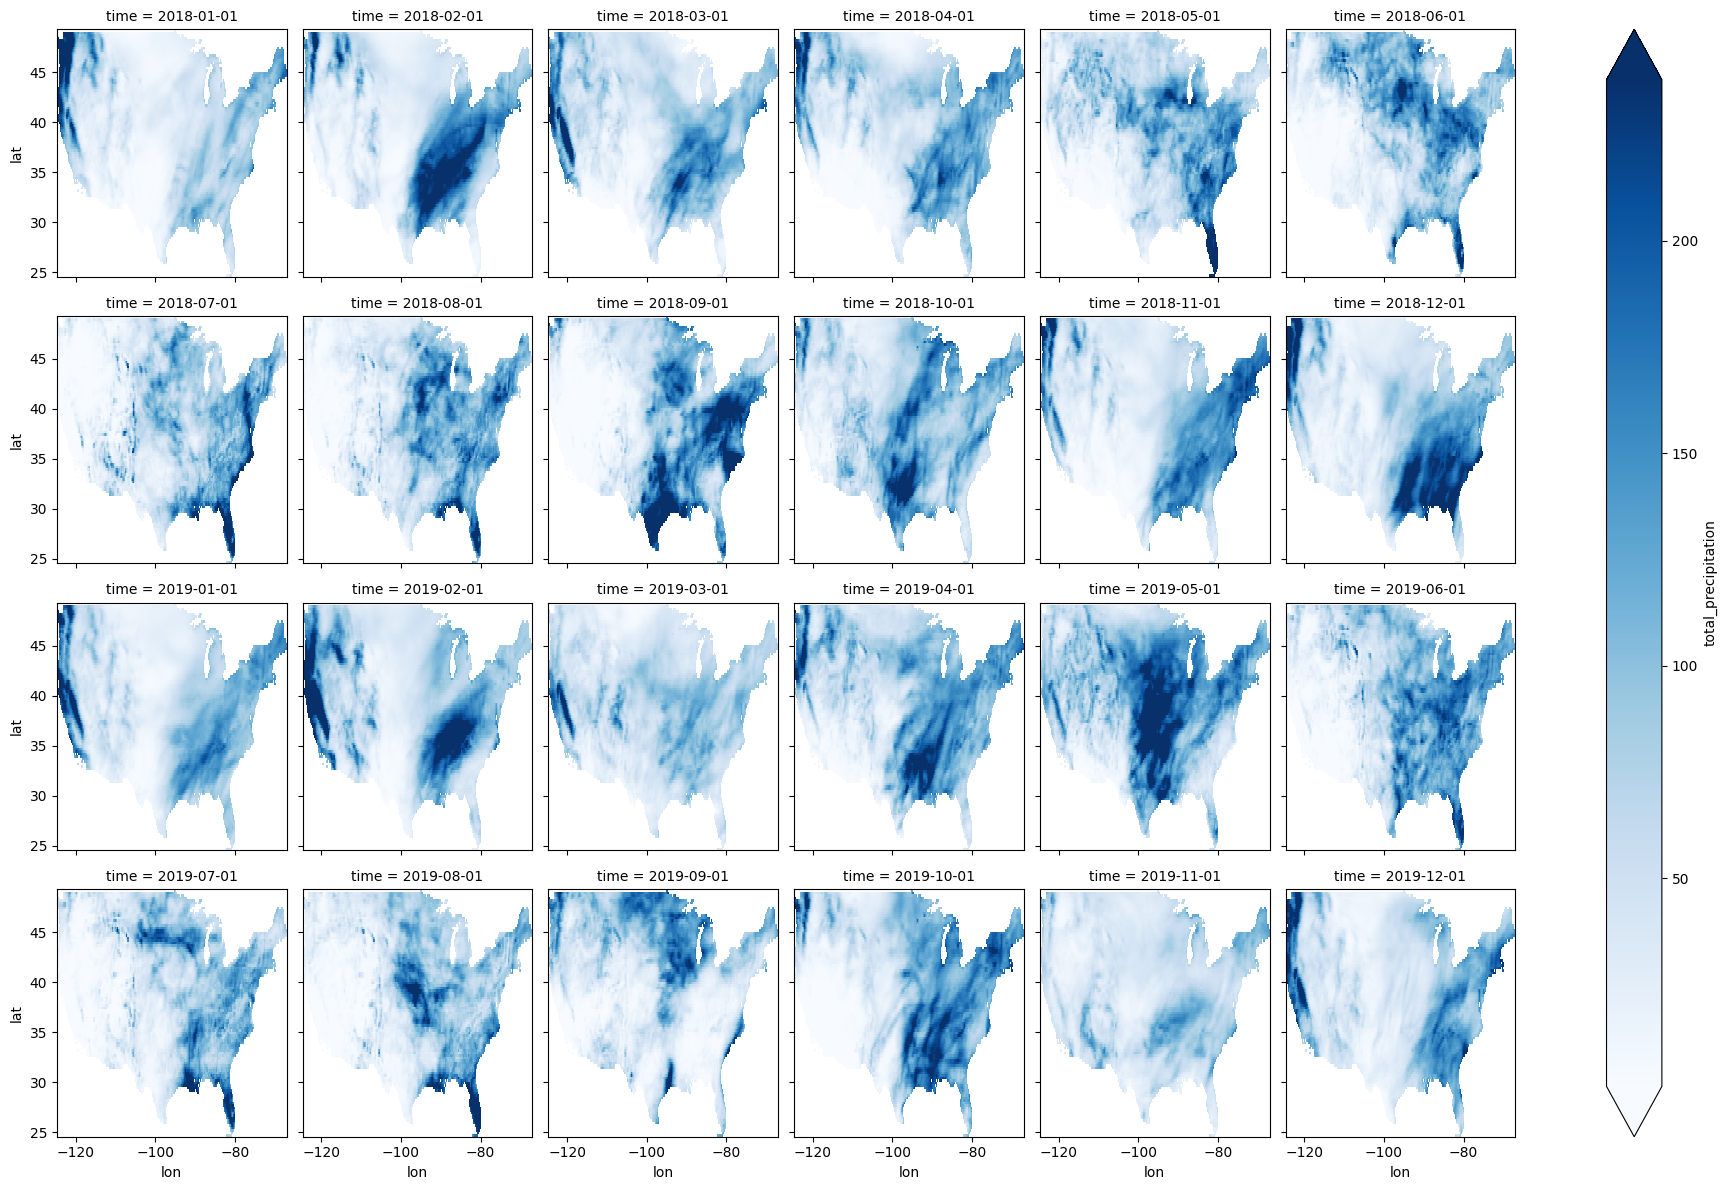

In [42]:
ds = ds.sortby('time') * 1000
ds.total_precipitation.plot(
    x='lon',
    y='lat',
    col='time',
    col_wrap=6,
    robust=True,
    cmap='Blues'
)